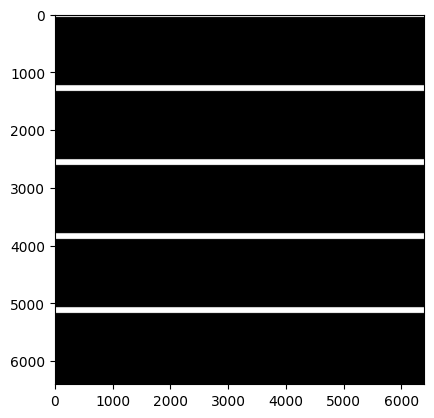

In [37]:
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from diffusers.utils import load_image

# load base and mask image
init_image = load_image("/Users/nikhil/Pictures/collage.png")
# mask_image = load_image(
#   "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png"
# )

mask_image = Image.new("1", init_image.size, 0)
draw = ImageDraw.Draw(mask_image)


def draw_grid_mask(size, num_rows, num_cols, grid_line_width):
  width, height = size
  for i in range(num_rows):
    if i % 10 != 0:
      continue
    draw.line(
      ((0, i * height / num_rows), (width, i * height / num_rows)),
      fill="white",
      width=grid_line_width,
    )
  # for i in range(num_cols):
  #   draw.line(
  #     ((i * width / num_cols, 0), (i * width / num_cols, height)),
  #     fill="white",
  #     width=grid_line_width,
  #   )


# draw_grid_mask(init_image.size, 50, 50, 100)
draw.rectangle(((40, 40), (4400, 4400)), fill="white")

plt.imshow(mask_image)
plt.show()

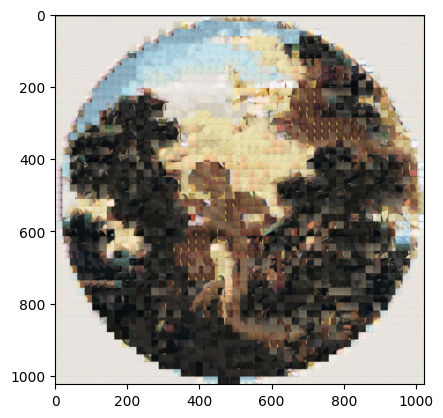

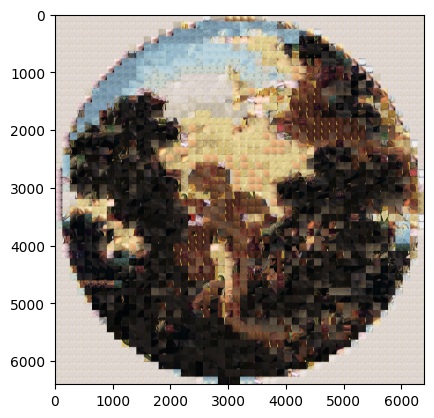

In [38]:
import modal
import io

inpaint = modal.Function.lookup("sd_inpaint", "StableDiffusion.run_inference")

output_image = inpaint.remote(
  init_image, mask_image, "A highly detailed collage of people with no hard edges, 8K"
)

image = Image.open(io.BytesIO(output_image))
# image.show()

plt.imshow(image)
plt.show()

plt.imshow(init_image)
plt.show()